<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/119_detecting_COVID_19_in_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">
</div>
<h1>ตรวจจับ COVID-19 จากภาพ X-ray</h1>

<h1>โดยใช้ AI ปัญญาประดิษฐ์</h1>
<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดยโปรแกรมเมอร์ไทย thai programmer</font></a>
<hr>

**ตัวอย่างโค้ดทั้งหมดจะนำมาจากคุณ Adrian Rosebrock**

* https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/

**อ้างอิง**

* https://github.com/ieee8023/covid-chestxray-dataset

* https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

**แต่ถ้าใช้ paper นี้**

* https://arxiv.org/abs/1409.1556

งานเขาอ้างความถูกต้อง 95% + accuracy, และ 94%+ (per image sensitivity).

**หรือข่าว AI ของทาง Alibaba**

* อ้างว่า AI ของเขามีความถูกต้อง 96% มากกว่าตัวอย่างนี้เสียอีก 
* https://thestandard.co/alibaba-say-ai-can-detect-coronavirus-96-percents-accuracy/

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">

# Setup environment

**ดาวน์โหลด dataset**

In [ ]:
#!git clone https://github.com/ieee8023/covid-chestxray-dataset
!wget https://www.dropbox.com/s/fwn42pc55e388a1/keras-covid-19.zip?dl=0 -O keras-covid-19.zip

--2020-03-28 18:37:41--  https://www.dropbox.com/s/fwn42pc55e388a1/keras-covid-19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fwn42pc55e388a1/keras-covid-19.zip [following]
--2020-03-28 18:37:41--  https://www.dropbox.com/s/raw/fwn42pc55e388a1/keras-covid-19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7236e99f766b36f2297d0206b.dl.dropboxusercontent.com/cd/0/inline/A0y3M1-8Sd-Kju6AWaJWOlwLHKwdnasw39eJ7y3pwrPEKYHs689r-GJFen8pvZVSXwB42XoFFAs499iv3F7zSJQ6We1Avia1Ak09gsqzf-Q82VNxK0rtNFo4G1X7-srFNzY/file# [following]
--2020-03-28 18:37:42--  https://uce7236e99f766b36f2297d0206b.dl.dropboxusercontent.com/cd/0/inline/A0y3M1-8Sd-Kju6AWaJWOlwLHKwdnasw39eJ7y3pwrPEKYHs689r-GJFen8pvZVSXwB42XoFFAs499iv3F7zSJQ6

**แตกไฟล์ dataset**

In [ ]:
!unzip -q -o /content/keras-covid-19.zip

# Import โมดูลต่างๆ

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
"""
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,	help="path to input dataset")
ap.add_argument("-p", "--plot", type=str, default="plot.png",	help="path to output loss/accuracy plot")
ap.add_argument("-m", "--model", type=str, default="covid19.model",	help="path to output loss/accuracy plot")
args = vars(ap.parse_args())
"""

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8


# Configuration

In [ ]:
#@title ป้อนข้อมูล (config)
dataset = "/content/keras-covid-19/dataset" #@param {type:"string"}
plot = "/content/keras-covid-19/plot.png" #@param {type:"string"}
model_path = "/content/keras-covid-19/covid19.model" #@param {type:"string"}


In [ ]:
args={}
args["dataset"]=dataset
args["plot"]=plot
args["model"]=model_path

# Prepare datasets

ที่มาของ dataset ชุดนี้ https://github.com/ieee8023/covid-chestxray-dataset


**ตัวอย่างภาพ X-ray คนที่เป็นโควิด-19**

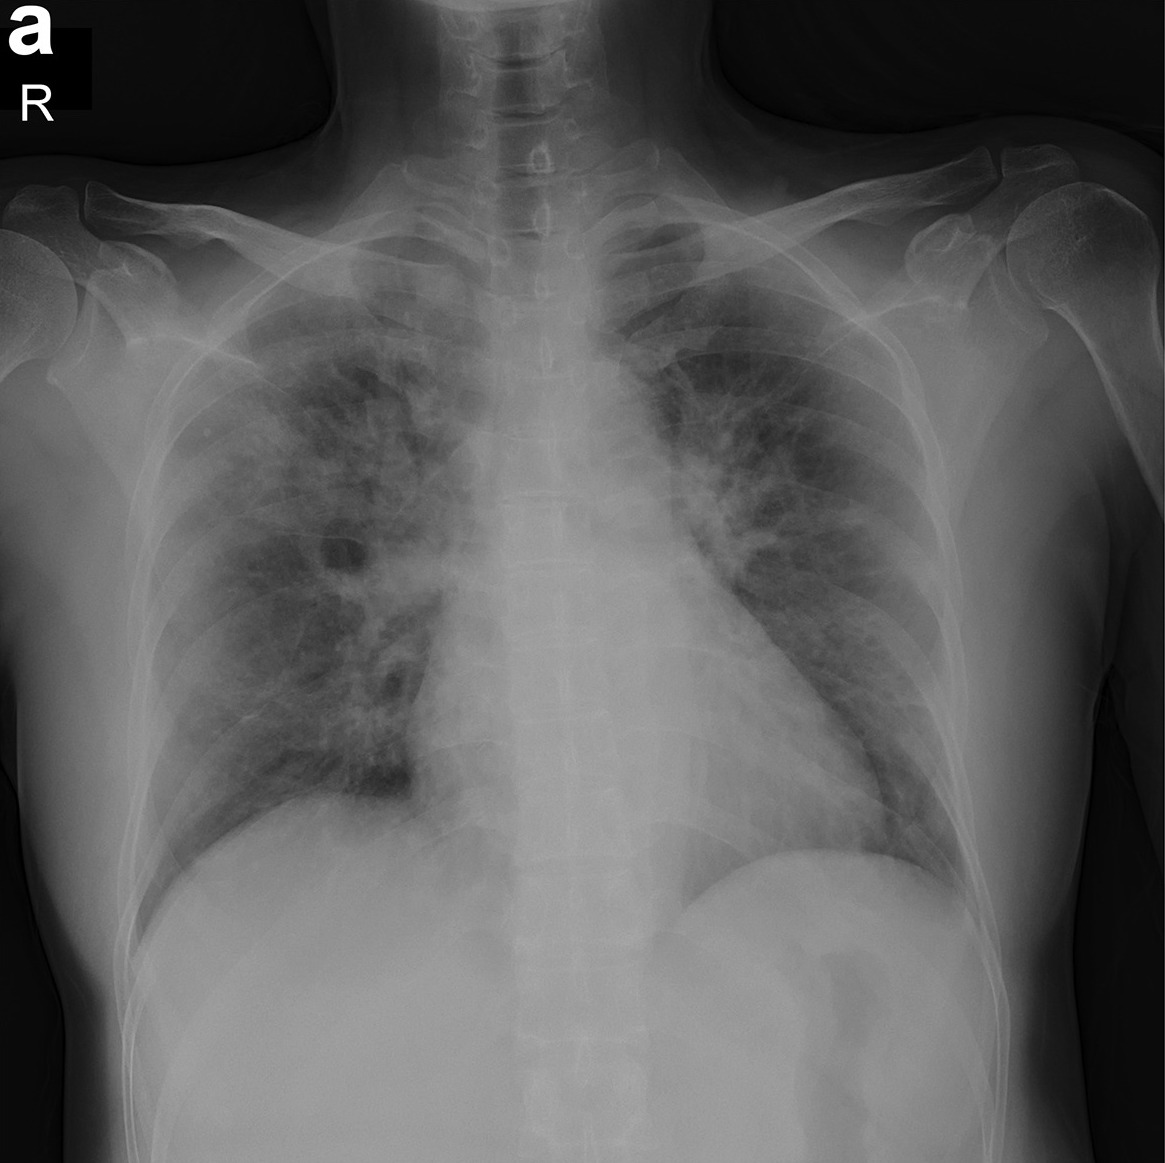

In [ ]:
from IPython.display import Image, display
display(Image('/content/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg',width=420))

**ตัวอย่างภาพ X-ray คนที่ไม่เป็น**

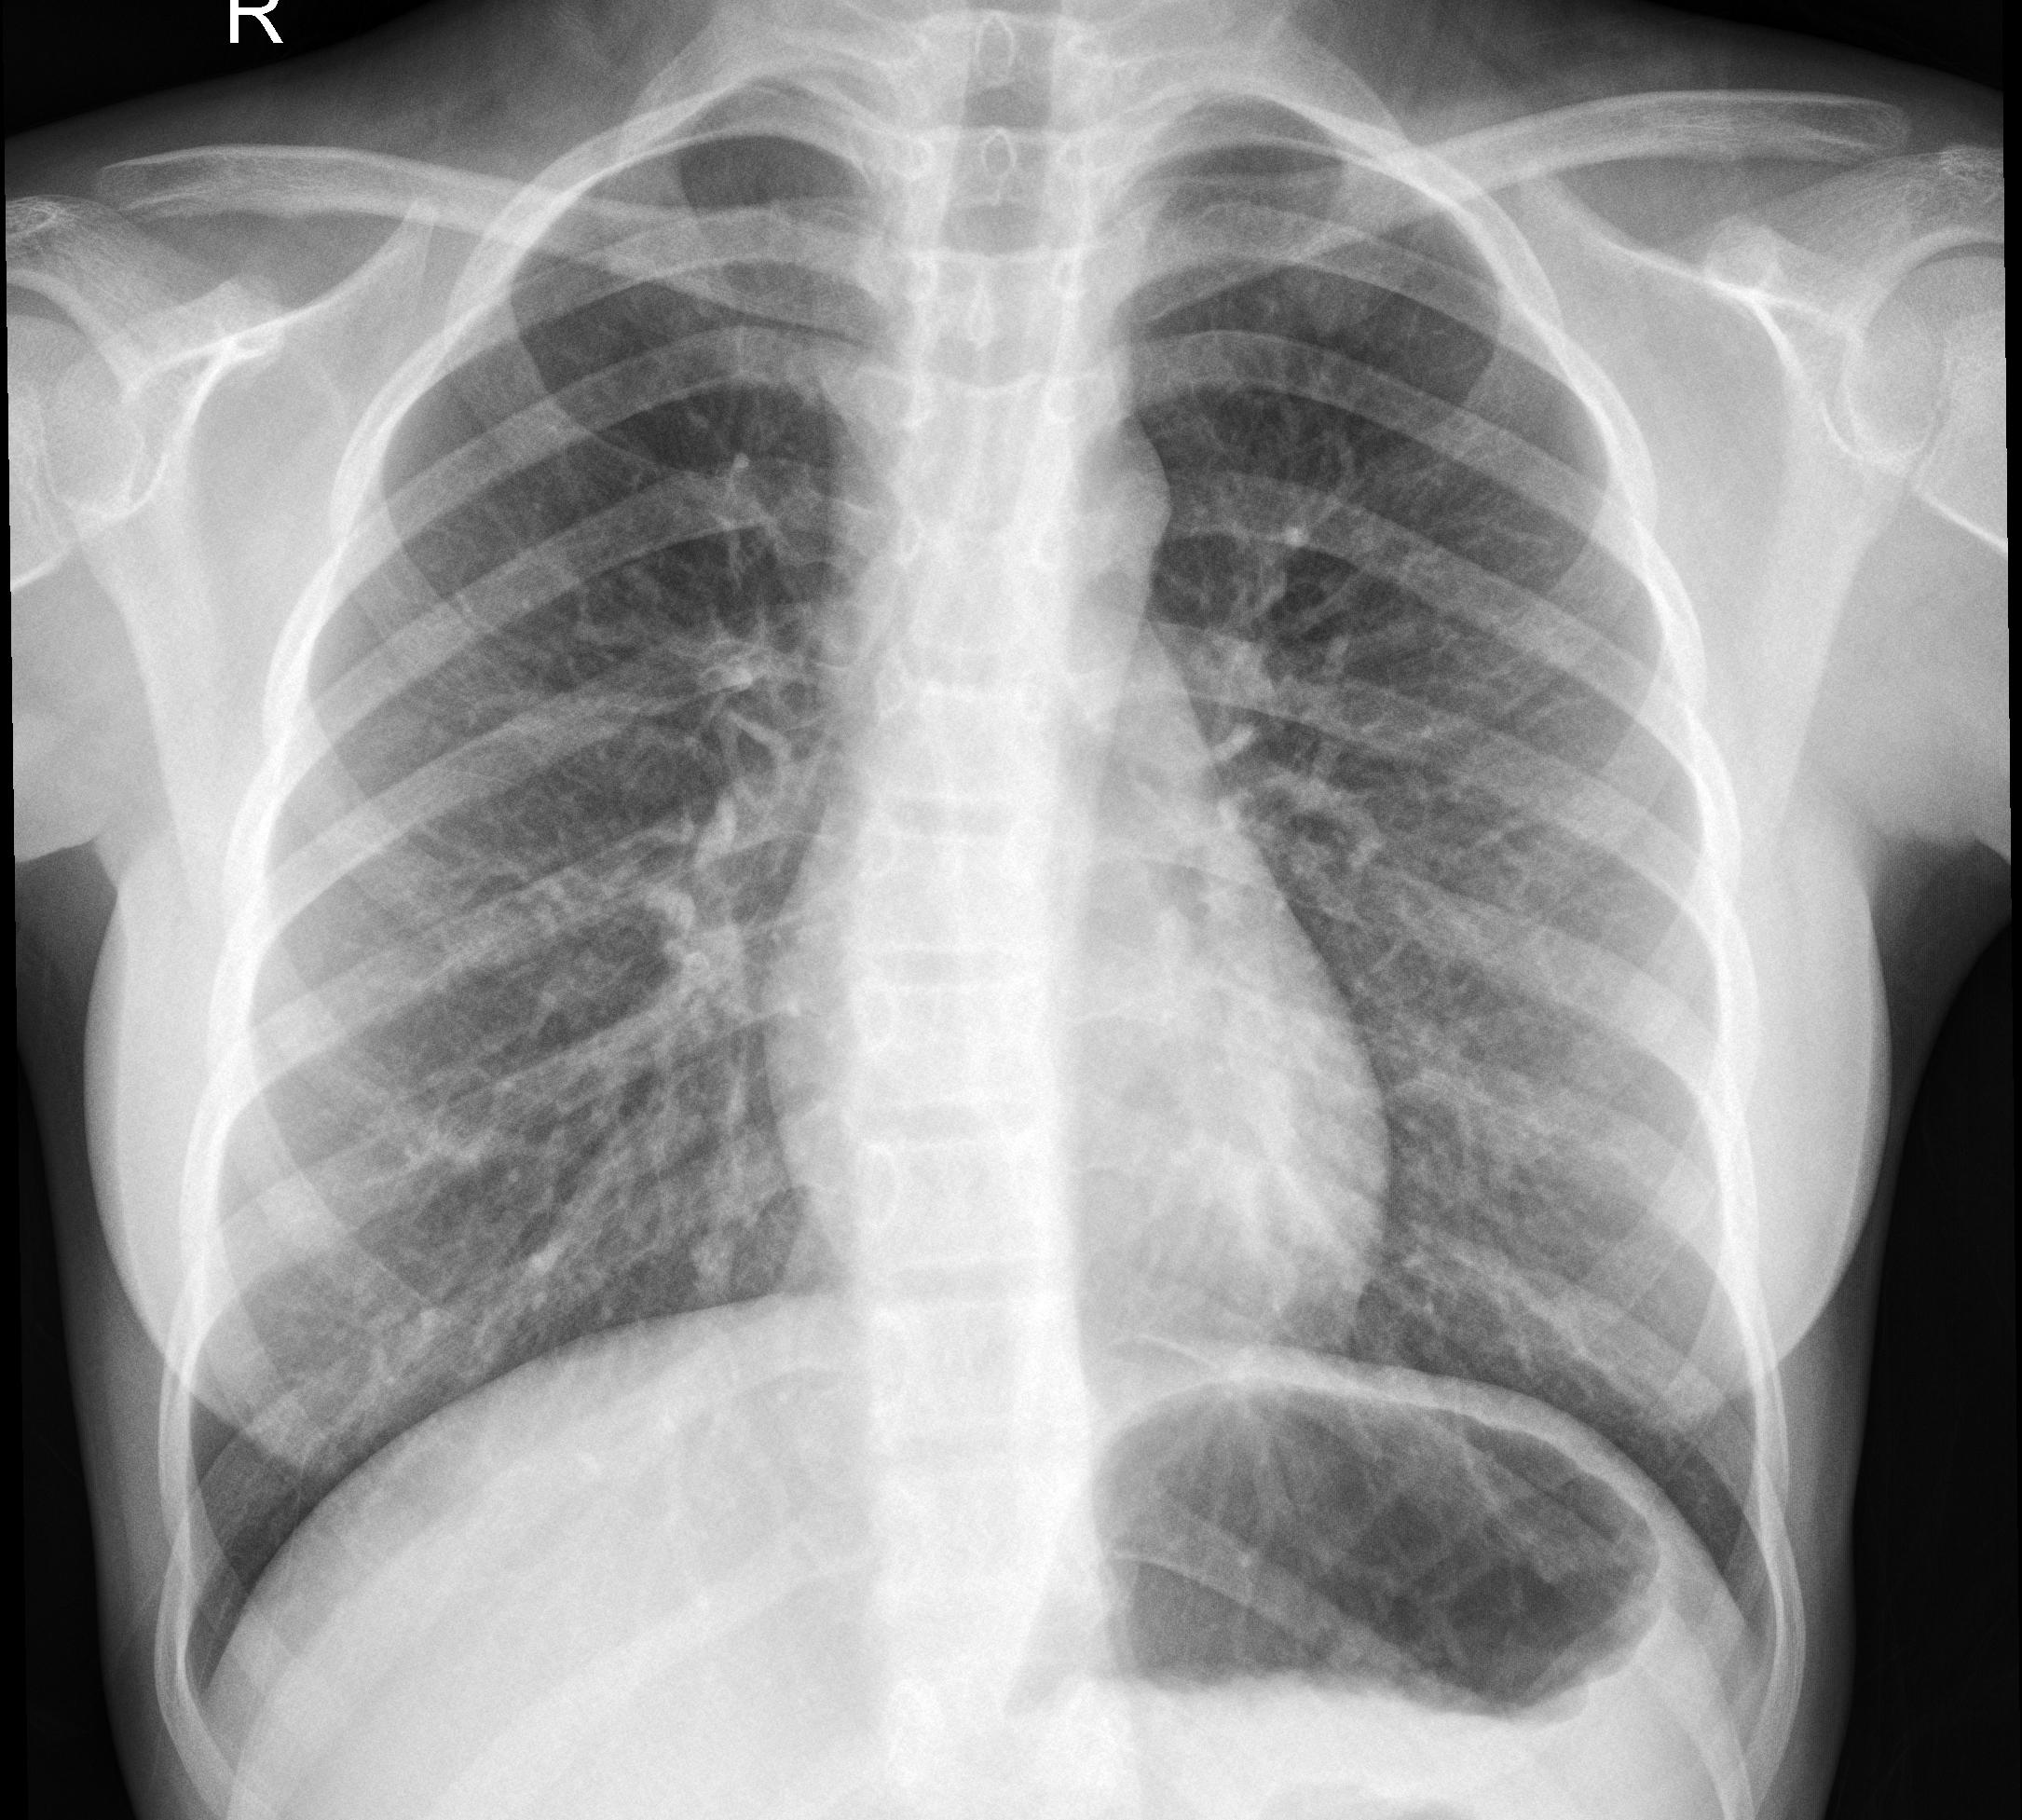

In [ ]:
from IPython.display import Image, display
display(Image('/content/keras-covid-19/dataset/normal/IM-0033-0001-0001.jpeg',width=420))

**เตรียม dataset**

* รูปภาพตัวอย่างที่ใช้สอน จะเก็บอยู่ในอาร์เรย์ 4 มิติ (จำนวนภาพ, height, width, channels ของสี) ในกรณีนี้จะใช้ภาพเป็น jpeg ที่มีขนาด height=224 width=224 และ chanel, มี 3 สีได้แก่ red green blue

* ซึ่งรูปภาพจะถูก normalization ง่ายๆ ด้วยการหาร 255

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images(dataset))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)


[INFO] loading images...


**แบ่ง dataset ออกเป็น 2 ส่วนได้แก่**
* training dataset
* test dataset

**label ที่ติดฉลากคำตอบบนรูปภาพมี 2 ค่าได้แก่**

* 'covid' ถูกเข้ารหัสเป็น [1, 0] หมายถึงเป็นโรค COVID-19
* 'normal' ถูกเข้ารหัสเป็น [0, 1] หมายถึงไม่เป็นโรค

**หมายเหตุ** การเข้ารหัสของฉลาดที่ติดคำตอบ เขาจะใช้วิธี one-hot encoding



In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels); # print(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

# Downlaod VGG16 Model

จะนำโมโดล VGG16 มาใช้งาน (เป็น Convolutional Neural Network: CNN)

ซึ่งในโค้ดจะมีการแก้ส่วนหัวของโมเดลเพิ่มเติมด้วย ให้เหมาะกับโจทย์ปัญหานี้

(paper ต้นฉบับของโมเดล VGG16 https://arxiv.org/abs/1409.1556)


In [ ]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# Train model

สอนโมเดล VGG 16 ให้ฉลาด โดยใช้
* optimize ด้วยอัลกอริทึม Adam
* loss function เป็น binary crossentropy (เพราะทำนายแค่ใช่กับไม่ใช่เท่านั้นเอง)

In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
5/5 [==============================] - 1s 133ms/step - loss: 0.8697 - accuracy: 0.4750 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 1s 107ms/step - loss: 0.7884 - accuracy: 0.6250 - val_loss: 0.7152 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 1s 102ms/step - loss: 0.7471 - accuracy: 0.5250 - val_loss: 0.6566 - val_accuracy: 0.9000
Epoch 4/25
5/5 [==============================] - 1s 112ms/step - loss: 0.6474 - accuracy: 0.6250 - val_loss: 0.6423 - val_accuracy: 0.6000
Epoch 5/25
5/5 [==============================] - 1s 109ms/step - loss: 0.6652 - accuracy: 0.6000 - val_loss: 0.6334 - val_accuracy: 0.8000
Epoch 6/25
5/5 [==============================] - 1s 102ms/step - loss: 0.7448 - accuracy: 0.5250 - val_loss: 0.6203 - val_accuracy: 0.8000
Epoch 7/25
5/5 [==============================] - 0s 97ms/step - loss: 0.6183 - accuracy: 0.6250 - val_loss: 0

# Testing

* นำโมเดลที่สอนเสร็จมาทดสอบกับ Test dataset
* แล้วประเมินผลด้วยการวัดค่า precision, recall, f1-score

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      0.80      0.89         5
      normal       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



# Measurement

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [0 5]]
acc: 0.9000
sensitivity: 0.8000
specificity: 1.0000


# Plot graph

**พล็อตกราฟ 4 เส้นได้แก่**
* ค่า loss function ทั้งตอนเทรนและ validation
* ค่าความถูกต้อง (accuracy) ทั้งตอนเทรนและ validation


ก็จะเห็นว่าทั้งตอนเทรนและ validation ค่า loss function มันลู่ต่ำลง 

ขณะที่ความถูกต้องก็เพิ่มสูงขึ้นเรื่อยๆ ก็แสดงว่าโมเดลใช้ได้อยู่

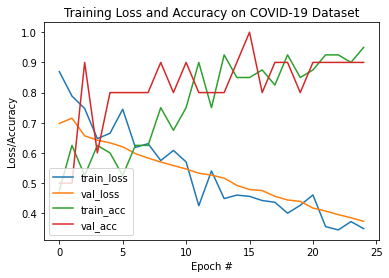

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
#plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])
plt.savefig(plot)

# เซฟโมเดลเก็บไว้ใช้งาน

บันทึกโมเดลที่สอนเสร็จ โดยจะอยู่ในไฟล์นามสกุล .h5 (เพราะใช้ไลบรารี่ keras)

In [ ]:
# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
# model.save(args["model"], save_format="h5")
model.save(model_path, save_format="h5")

[INFO] saving COVID-19 detector model...


**สามารถดาวน์โหลดไฟล์โมเดลมาเก็บไว้ที่เครื่องเราได้** ขนาดประมาณเกือบ 60 MB (เสียเวลาดาวน์โหลด ต้องรอหน่อย)

In [ ]:
#from google.colab import files
#files.download(model_path)

# ตัวอย่างการเอาโมเดลไปใช้งาน

**ดาวน์โหลดภาพตัวอย่าง (อยากรู้ว่าเป็น covid-19 หรือไม่)**

In [ ]:
!wget https://github.com/ieee8023/covid-chestxray-dataset/blob/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg?raw=true -O "/content/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg"

--2020-03-28 18:38:13--  https://github.com/ieee8023/covid-chestxray-dataset/blob/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg [following]
--2020-03-28 18:38:13--  https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg [following]
--2020-03-28 18:38:13--  https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg
Resolving raw.githubus

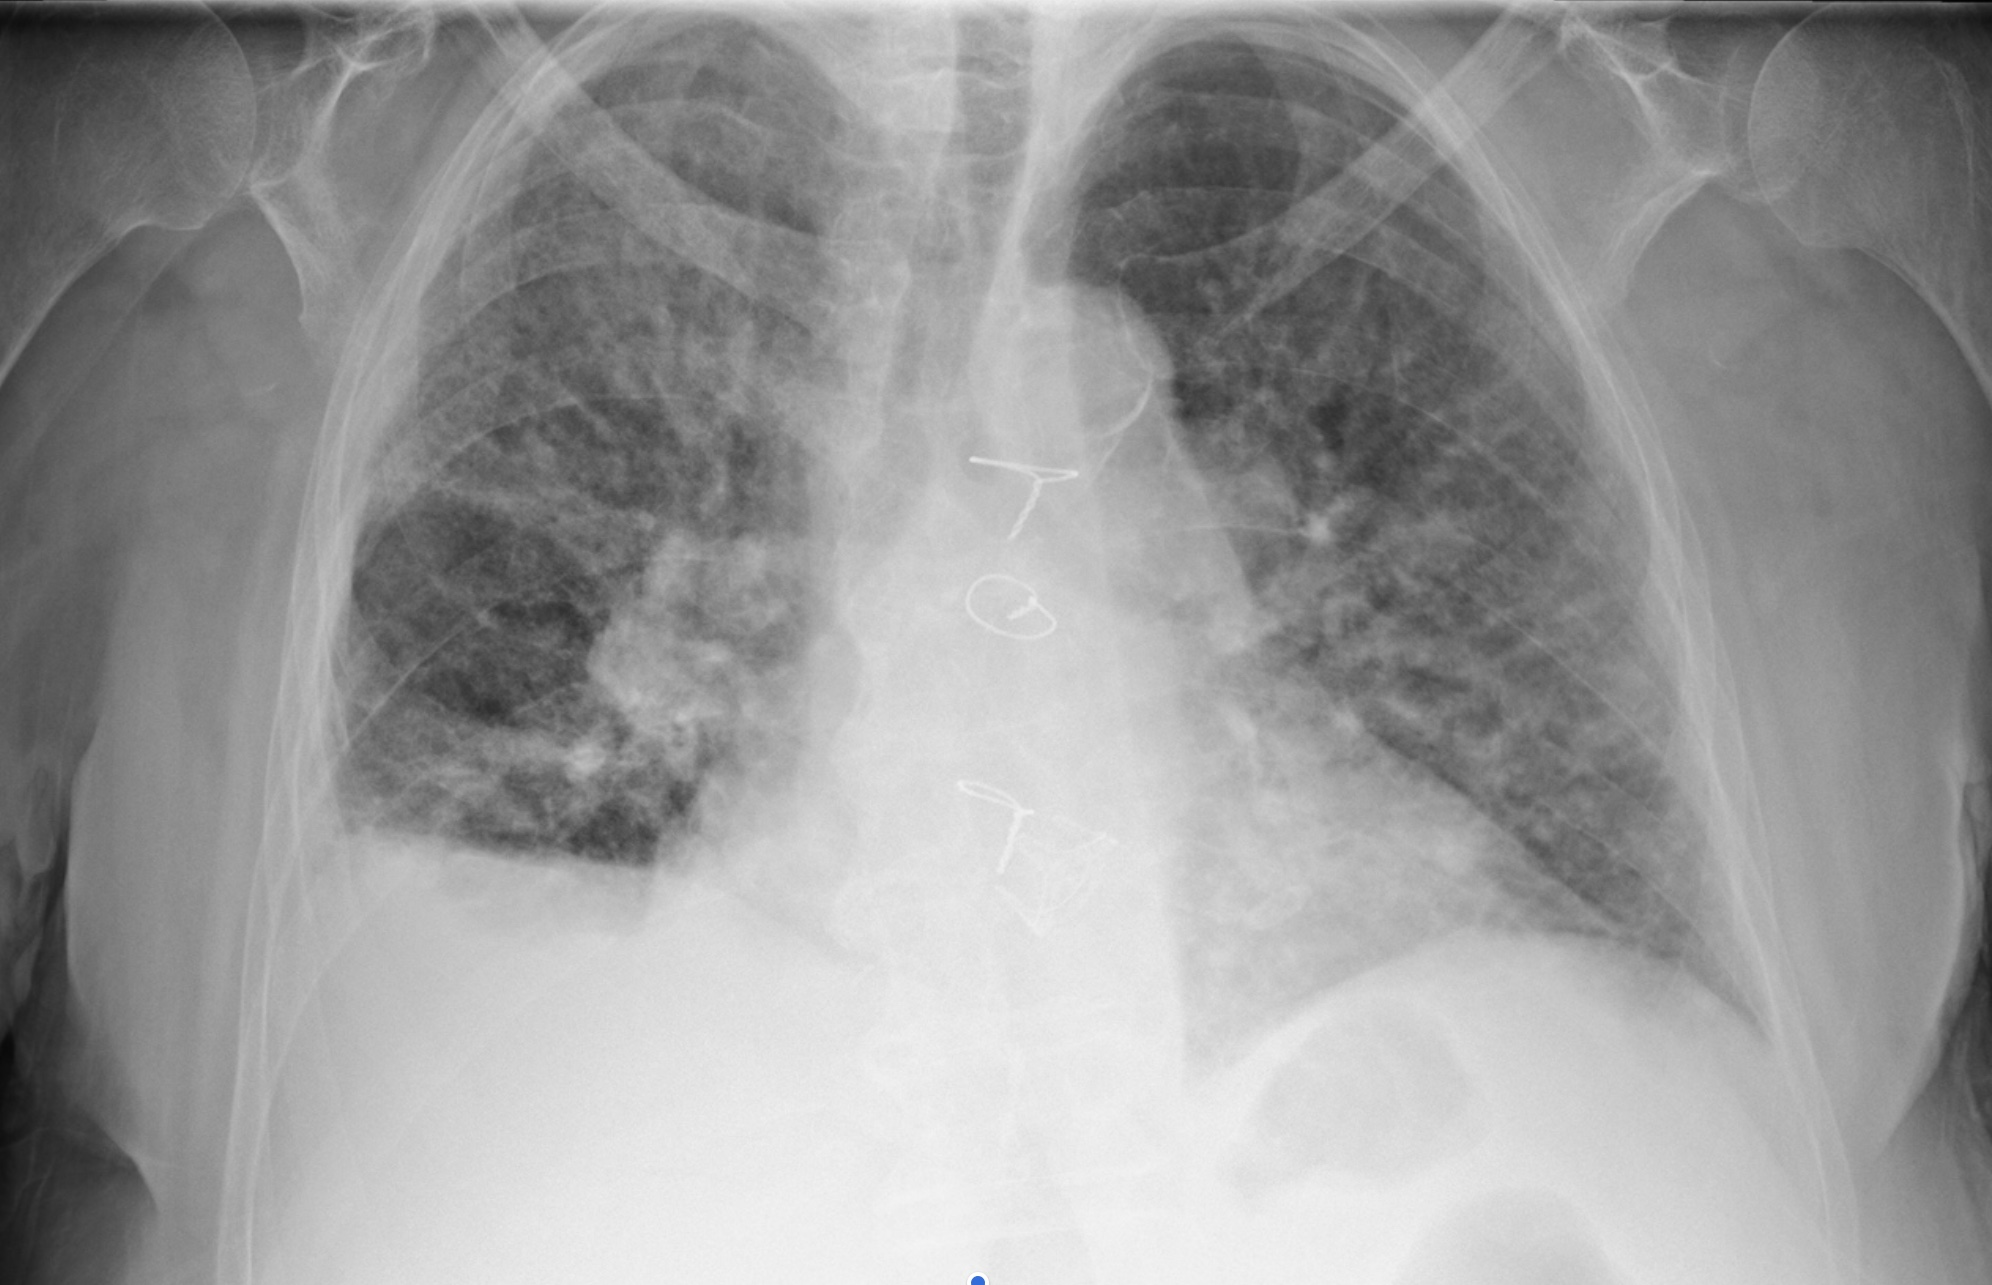

In [ ]:
display(Image('/content/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg',width=420))

**ลองให้โมเดลทำนาย**

แต่อยากลืมภาพที่เตรียมไว้ต้องมีขนาดมีขนาด height=224 width=224 และ chanel, มี 3 สีได้แก่ red green blue 

(มันเป็นเงื่อนไขเวลาใช้งานโมเดล  VGG16 กำหนดขนาดรูปภาพแบบนี้)

แล้วต้องนำรูปมาทำ normalize ด้วยการหาร 255

ดังนั้นก็จะมีโค้ดเขียนเพิ่มเติมเพื่อเตรียมรูปภาพให้เหมาะสมก่อนป้อนเข้าสู่โมเดล เพื่อให้มันทำนายค่าออกมา

In [ ]:
image_unknow = cv2.imread(imagePath)
image_unknow = cv2.cvtColor(image_unknow, cv2.COLOR_BGR2RGB)
image_unknow = cv2.resize(image_unknow, (224, 224)) # size of picture = [224, 224, 3]
data = [image_unknow] # size of picture arrays = [1, 224, 224, 3]
data = np.array(data) / 255.0

predIdxs = model.predict(data, batch_size=1)
result = np.argmax(predIdxs, axis=1)

if result == 0:
  print("เป็นโรค COVID-19")
if result == 1:
  print("ปกติทุกอย่าง")


ปกติทุกอย่าง


# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

# ฝากประชาสัมพันธ์

In [ ]:
#@title หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>